In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data # Ler dados da internet
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

In [ ]:
#gol_df = data.DataReader(name = 'GOLL4.SA', data_source='yahoo', start='2015-01-01')
gol_df = yf.download("GOLL4.SA", start='2015-01-01')

In [ ]:
gol_df

In [ ]:
gol_df.info()

In [ ]:
gol_df.describe()

In [ ]:
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']
acoes_df = pd.DataFrame()
for acao in acoes:
  #acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']
  acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']

In [ ]:
acoes_df = acoes_df.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE',
                                    'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTS', 'BOVA11.SA': 'BOVA'})

In [ ]:
acoes_df.dropna(inplace=True)

In [ ]:
acoes_df.to_csv('acoes.csv')

In [ ]:
acoes_df = pd.read_csv('acoes.csv')
acoes_df

VISUALIZAÇÃO

In [ ]:
sns.histplot(acoes_df['GOL'])

In [ ]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
    plt.subplot(7,1,i+1) # O data frame é dividido em 7 colunas. Cada corte vale uma coluna e i + 1 é o label do gráfico
    sns.histplot(acoes_df[acoes_df.columns[i]], kde=True)
    plt.title(acoes_df.columns[i])

In [ ]:
sns.boxplot(x = acoes_df['GOL'])
# Os pontos na figura são os outliers

In [ ]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
    plt.subplot(7,1,i+1) # O data frame é dividido em 7 colunas. Cada corte vale uma coluna e i + 1 é o label do gráfico
    sns.boxplot(x = acoes_df[acoes_df.columns[i]])
    plt.title(acoes_df.columns[i])

In [ ]:
# Gerando gráfico com o pandas usando o matplotlib por baixo dos panos
acoes_df.plot(x = 'Date', figsize = (15,7), title = "Historico do preço das açoes")

NORMALIZAÇÃO

In [ ]:
acoes_df_normalizado = acoes_df.copy()
# Normalização está sendo dividir os valores de cada coluna pelo primeiro valor de cada coluna
for i in acoes_df_normalizado.columns[1:]:
    acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [ ]:
acoes_df_normalizado
# Ao comparar a ultima com a primeira linha de cada coluna, nota-se como as acoes evoluiram

In [ ]:
# Gerando gráfico com o pandas usando o matplotlib por baixo dos panos
acoes_df_normalizado.plot(x = 'Date', figsize = (15,7), title = "Historico do preço das açoes")

# Ganho de dinheiro significativo com a Magalu

CRIANDO GRAFICOS DINAMICOS

In [ ]:
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes_df.columns[1:]:
    figura.add_scatter(x = acoes_df['Date'], y = acoes_df[i], name = i)
figura.show()

# Para dar zoom, basta selecionar uma área do gráfico. Para voltar ao original, ir em autoscale

In [ ]:
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes_df_normalizado.columns[1:]:
    figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()

# Para dar zoom, basta selecionar uma área do gráfico. Para voltar ao original, ir em autoscale

CRIANDO NOVA BASE DE DADOS

In [139]:
acoes_ex = ['ABEV3.SA', 'ODPV3.SA', 'VIVT3.SA', 'PETR3.SA', 'BBAS3.SA', 'BOVA11.SA']
acoes_df_ex = pd.DataFrame()
for acao in acoes_ex:
  #acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']
  acoes_df_ex[acao] = yf.download(acao, start='2015-01-01')['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [142]:
acoes_df_ex = acoes_df_ex.rename(columns={'ABEV3.SA': 'AMBEV', 
                                          'ODPV3.SA': 'ODONTOPREV', 
                                          'VIVT3.SA': 'VIVO',
                                          'PETR3.SA': 'PETROBRAS', 
                                          'BBAS3.SA': 'BBRASIL', 
                                          'BOVA11.SA': 'BOVA'})


In [144]:
acoes_df_ex.columns

Index(['AMBEV', 'ODONTOPREV', 'VIVO', 'PETROBRAS', 'BBRASIL', 'BOVA'], dtype='object')

In [145]:
acoes_df_ex.to_csv('acoes_ex.csv')

In [146]:
acoes_ex = pd.read_csv('acoes_ex.csv')

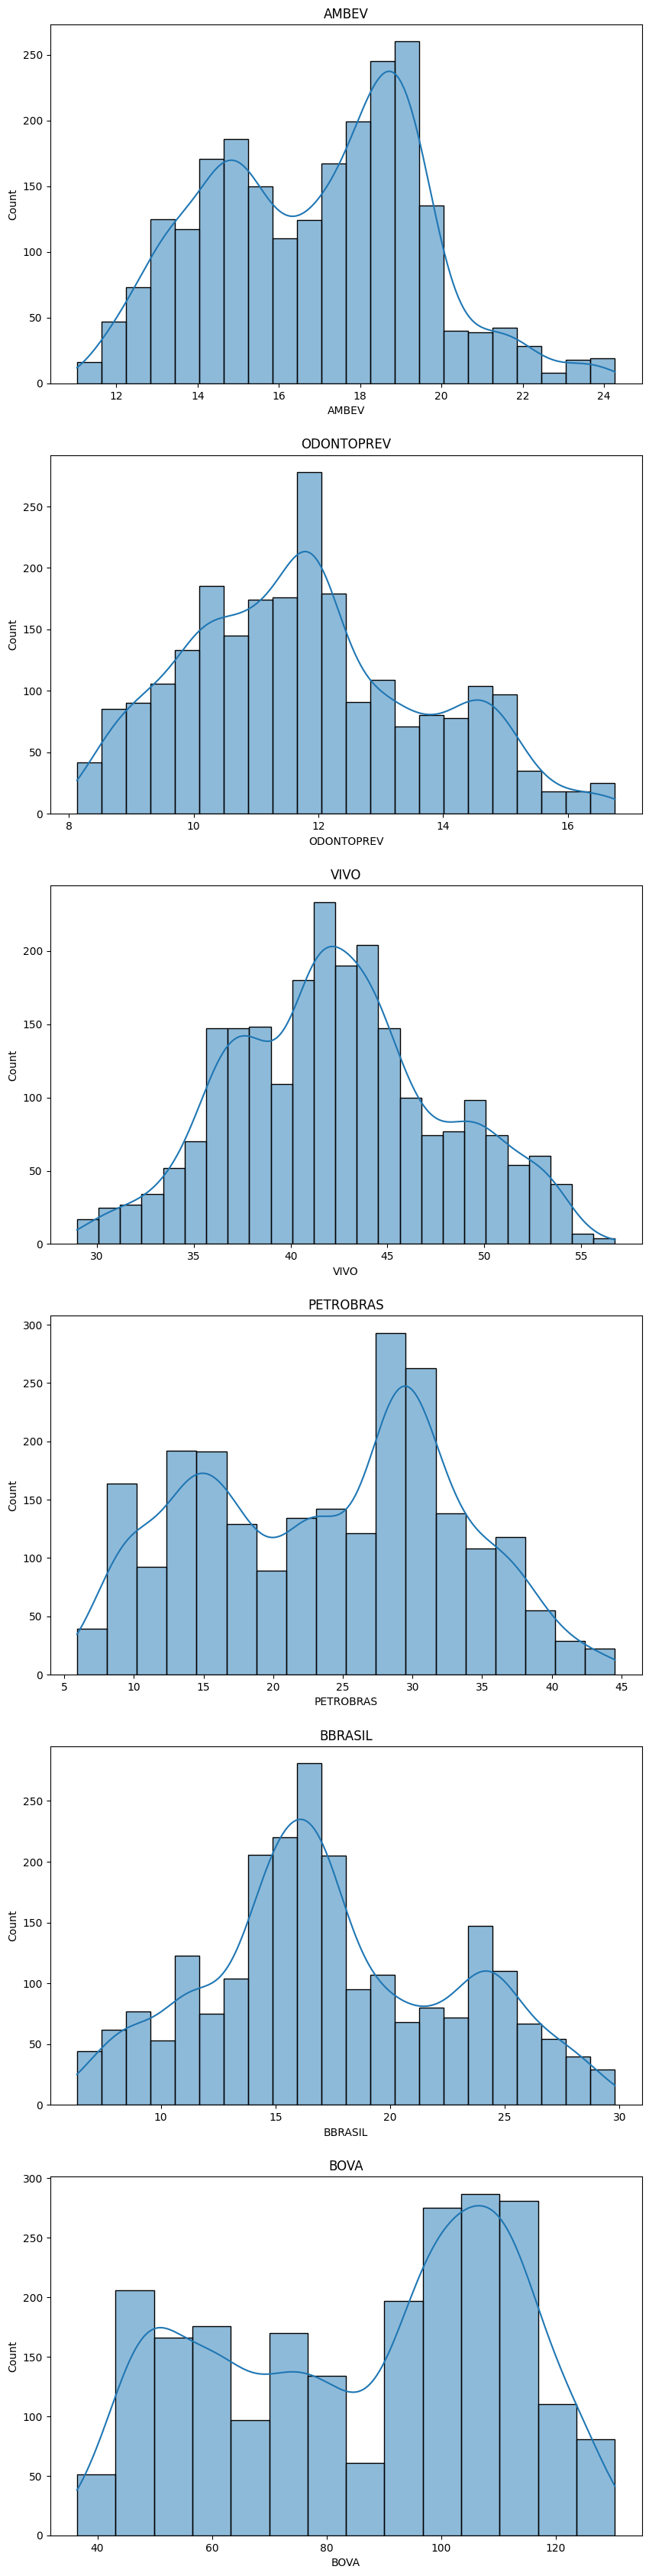

In [147]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_ex.columns)):
    plt.subplot(7,1,i+1) # O data frame é dividido em 7 colunas. Cada corte vale uma coluna e i + 1 é o label do gráfico
    sns.histplot(acoes_ex[acoes_ex.columns[i]], kde=True)
    plt.title(acoes_ex.columns[i])

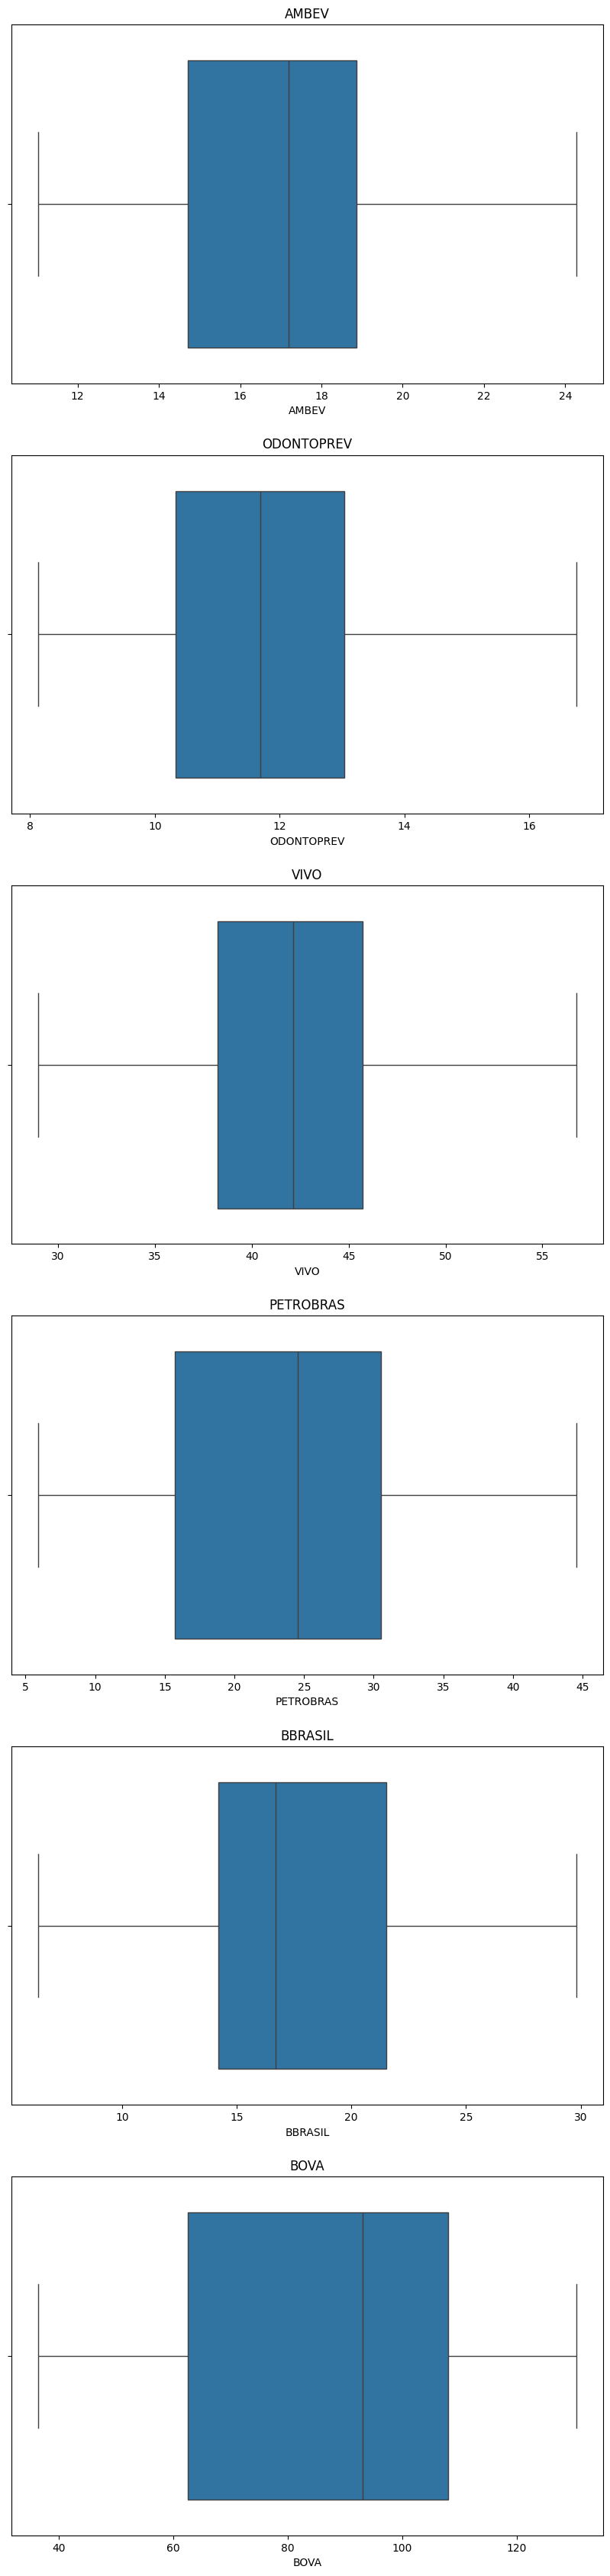

In [148]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_ex.columns)):
    plt.subplot(7,1,i+1) # O data frame é dividido em 7 colunas. Cada corte vale uma coluna e i + 1 é o label do gráfico
    sns.boxplot(x = acoes_ex[acoes_ex.columns[i]])
    plt.title(acoes_ex.columns[i])

<Axes: title={'center': 'Historico do preço das açoes'}, xlabel='Date'>

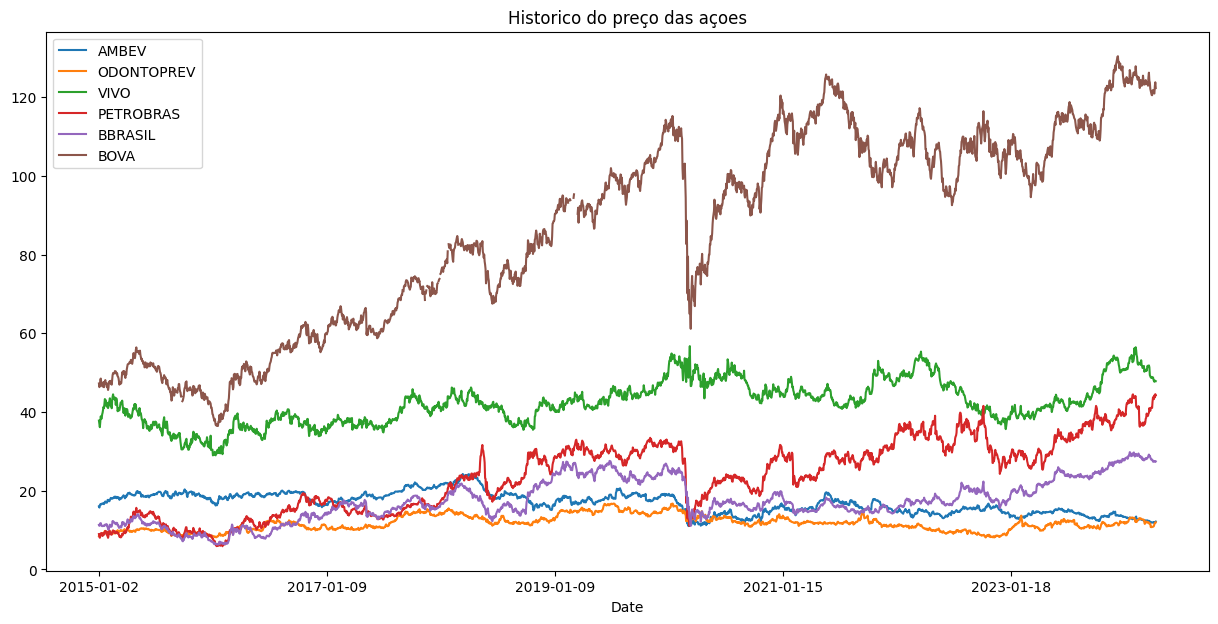

In [149]:
# Gerando gráfico com o pandas usando o matplotlib por baixo dos panos
acoes_ex.plot(x = 'Date', figsize = (15,7), title = "Historico do preço das açoes")

In [150]:
acoes_ex_normalizado = acoes_ex.copy()
# Normalização está sendo dividir os valores de cada coluna pelo primeiro valor de cada coluna
for i in acoes_ex_normalizado.columns[1:]:
    acoes_ex_normalizado[i] = acoes_ex_normalizado[i] / acoes_ex_normalizado[i][0]

<Axes: title={'center': 'Historico do preço das açoes'}, xlabel='Date'>

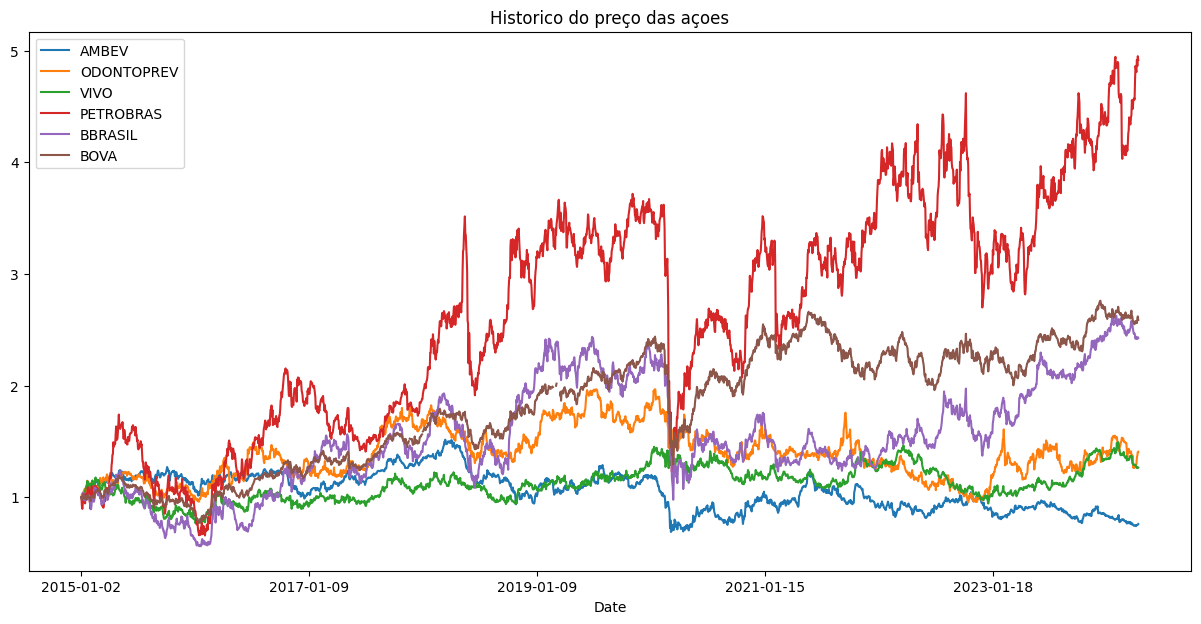

In [151]:
# Gerando gráfico com o pandas usando o matplotlib por baixo dos panos
acoes_ex_normalizado.plot(x = 'Date', figsize = (15,7), title = "Historico do preço das açoes")

In [152]:
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes_ex.columns[1:]:
    figura.add_scatter(x = acoes_ex['Date'], y = acoes_ex[i], name = i)
figura.show()

# Para dar zoom, basta selecionar uma área do gráfico. Para voltar ao original, ir em autoscale

In [153]:
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes_ex_normalizado.columns[1:]:
    figura.add_scatter(x = acoes_ex_normalizado['Date'], y = acoes_ex_normalizado[i], name = i)
figura.show()

# Para dar zoom, basta selecionar uma área do gráfico. Para voltar ao original, ir em autoscale